# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [3]:
data = pd.read_excel('geo.xlsx')

In [4]:
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [5]:
data.comment_class.value_counts()

-1    95147
 1    13659
Name: comment_class, dtype: int64

In [113]:
comm_yes=data[data.comment_class==1]
comm_no=data[data.comment_class==-1]


In [117]:
X_comm_yes=(np.asarray(comm_yes.x)).reshape(-1,1)
Y_comm_yes=(np.asarray(comm_yes.y)).reshape(-1,1)
X_comm_no=(np.asarray(comm_no.x)).reshape(-1,1)
Y_comm_no=(np.asarray(comm_no.y)).reshape(-1,1)

In [119]:
w_comm_yes=np.hstack((X_comm_yes, Y_comm_yes))
w_comm_no=np.hstack((X_comm_no, Y_comm_no))

In [34]:
X_coords=data.x
Y_coords=data.y

In [38]:
X=np.asarray(X_coords)
Y=np.asarray(Y_coords)

array([[37.588916, 55.741982],
       [37.589311, 55.734273],
       [37.558526, 55.728758],
       ...,
       [37.451249, 55.83662 ],
       [37.454528, 55.792331],
       [37.421066, 55.848756]])

In [31]:
# w=np.reshape(X_coords, Y_coords)
# w
#X_coords
# X=[]
# for x in X_coords:
#     X.append(x)
# Y=[]
# for y in Y_coords:
#     Y.append(y)

In [89]:
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

w=np.hstack((X, Y))


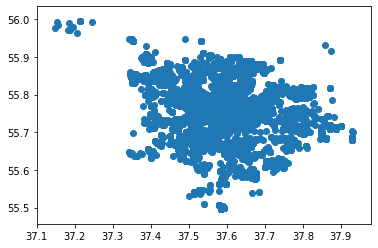

In [78]:
plt.scatter(X, Y)

In [24]:
from sklearn.cluster import KMeans


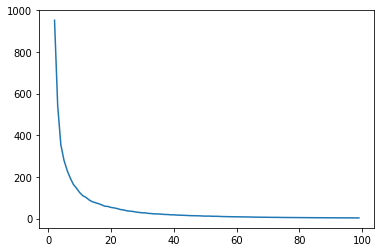

In [63]:
intertias = []
for k in range(2, 100):
    mns = KMeans(n_clusters=k)
    mns.fit(w)
    intertias.append(mns.inertia_)
plt.plot(list(range(2, 100)), intertias)

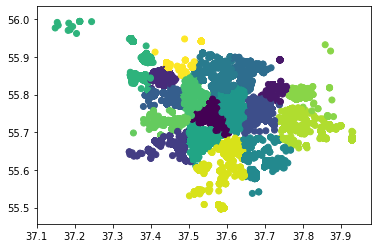

In [104]:
kmeans_okrug = KMeans(n_clusters=18)
output = kmeans_okrug.fit_predict(w)
plt.scatter(w[:, 0], w[:, 1], c=output)

In [107]:
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score
#print('ARI:', adjusted_mutual_info_score(Y, output))
print('SIL:', silhouette_score(w, output))

SIL: 0.5853090027972911


Распределение районов с голосами "За"

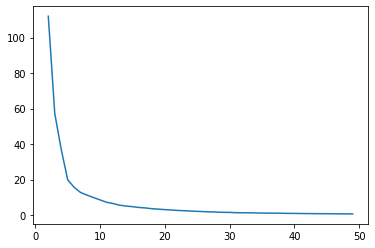

In [121]:
intertias = []
for k in range(2, 50):
    mns = KMeans(n_clusters=k)
    mns.fit(w_comm_yes)
    intertias.append(mns.inertia_)
plt.plot(list(range(2, 50)), intertias)

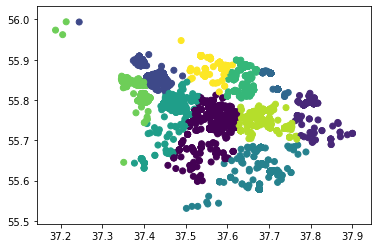

In [131]:
kmeans_okrug_yes = KMeans(n_clusters=10)
output_yes = kmeans_okrug_yes.fit_predict(w_comm_yes)
plt.scatter(w_comm_yes[:, 0], w_comm_yes[:, 1], c=output_yes)

In [132]:
print('SIL:', silhouette_score(w_comm_yes, output_yes))

SIL: 0.7432368143664738


Распределение районов с голосами "Против"

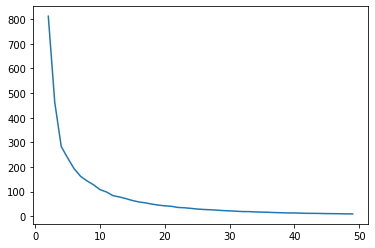

In [126]:
intertias = []
for k in range(2, 50):
    mns = KMeans(n_clusters=k)
    mns.fit(w_comm_no)
    intertias.append(mns.inertia_)
plt.plot(list(range(2, 50)), intertias)

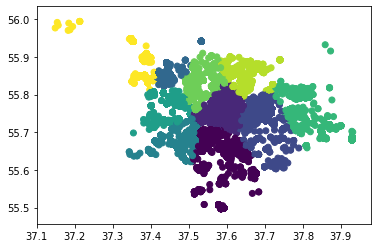

In [133]:
kmeans_okrug_no = KMeans(n_clusters=10)
output_no = kmeans_okrug_no.fit_predict(w_comm_no)
plt.scatter(w_comm_no[:, 0], w_comm_no[:, 1], c=output_no)

In [134]:
print('SIL:', silhouette_score(w_comm_no, output_no))

SIL: 0.5740412633406574
